## Importing the Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from sklearn import preprocessing
from scipy.io import arff
import time

In [4]:
df = pd.read_csv('divorce_data.csv')
df

Q1;Q2;Q3;Q4;Q5;Q6;Q7;Q8;Q9;Q10;Q11;Q12;Q13;Q14;Q15;Q16;Q17;Q18;Q19;Q20;Q21;Q22;Q23;Q24;Q25;Q26;Q27;Q28;Q29;Q30;Q31;Q32;Q33;Q34;Q35;Q36;Q37;Q38;Q39;Q40;Q41;Q42;Q43;Q44;Q45;Q46;Q47;Q48;Q49;Q50;Q51;Q52;Q53;Q54;Divorce
0    2;2;4;1;0;0;0;0;0;0;1;0;1;1;0;1;0;0;0;1;0;0;0;...                                                                                                                                                                    
1    4;4;4;4;4;0;0;4;4;4;4;3;4;0;4;4;4;4;3;2;1;1;0;...                                                                                                                                                                    
2    2;2;2;2;1;3;2;1;1;2;3;4;2;3;3;3;3;3;3;2;1;0;1;...                                                                                                                                                                    
3    3;2;3;2;3;3;3;3;3;3;4;3;3;4;3;3;3;3;3;4;1;1;1;...                                                                                                                                                                    
4    2;2;1;1;1;1;0;0;0;0;0;1;0;1;1;1;1;1;2;1;1;0;0;...                                                                                                                                                                    
..                                                 ...                                                                                                                                                                    
165  0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...                                                                                                                                                                    
166  0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;...                                                                                                                                                                    
167  1;1;0;0;0;0;0;0;0;1;0;1;1;0;0;1;0;0;0;1;0;0;0;...                                                                                                                                                                    
168  0;0;0;0;0;0;0;0;0;0;0;1;0;0;0;0;0;0;0;0;0;0;0;...                                                                                                                                                                    
169  0;0;0;0;0;0;0;1;0;0;0;1;1;1;0;0;0;0;0;1;1;0;1;...                                                                                                                                                                    

[170 rows x 1 columns]

## Importing the dataset

In [2]:
data = pd.read_csv('divorce_data.csv', sep=";")
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [3]:
print(X)

[[2 2 4 ... 3 2 1]
 [4 4 4 ... 4 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [1 1 0 ... 3 0 0]
 [0 0 0 ... 4 3 1]
 [0 0 0 ... 3 3 1]]


In [4]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [5]:
data.head()

Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  Q46  Q47  Q48  Q49  Q50  Q51  \
0   2   2   4   1   0   0   0   0   0    0  ...    2    1    3    3    3    2   
1   4   4   4   4   4   0   0   4   4    4  ...    2    2    3    4    4    4   
2   2   2   2   2   1   3   2   1   1    2  ...    3    2    3    1    1    1   
3   3   2   3   2   3   3   3   3   3    3  ...    2    2    3    3    3    3   
4   2   2   1   1   1   1   0   0   0    0  ...    2    1    2    3    2    2   

   Q52  Q53  Q54  Divorce  
0    3    2    1        1  
1    4    2    2        1  
2    2    2    2        1  
3    2    2    2        1  
4    2    1    0        1  

[5 rows x 55 columns]

## Preprocessing/Cleaning/Missing Data

In [6]:
#See if there are any null values
null = data.isnull().sum().sort_values(ascending=False)
#null

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [8]:
print(X)

[[2 2 4 ... 3 2 1]
 [4 4 4 ... 4 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [1 1 0 ... 3 0 0]
 [0 0 0 ... 4 3 1]
 [0 0 0 ... 3 3 1]]


## Summary Stats

In [9]:
data.describe()

Q1          Q2          Q3          Q4          Q5          Q6  \
count  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000   
mean     1.776471    1.652941    1.764706    1.482353    1.541176    0.747059   
std      1.627257    1.468654    1.415444    1.504327    1.632169    0.904046   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      2.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
75%      3.000000    3.000000    3.000000    3.000000    3.000000    1.000000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

               Q7          Q8          Q9         Q10  ...         Q46  \
count  170.000000  170.000000  170.000000  170.000000  ...  170.000000   
mean     0.494118    1.452941    1.458824    1.576471  ...    2.552941   
std      0.898698    1.546371    1.557976    1.421529  ...    1.371786   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    2.000000   
50%      0.000000    1.000000    1.000000    2.000000  ...    3.000000   
75%      1.000000    3.000000    3.000000    3.000000  ...    4.000000   
max      4.000000    4.000000    4.000000    4.000000  ...    4.000000   

              Q47         Q48         Q49         Q50         Q51         Q52  \
count  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000   
mean     2.270588    2.741176    2.382353    2.429412    2.476471    2.517647   
std      1.586841    1.137348    1.511587    1.405090    1.260238    1.476537   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    2.000000    1.000000    1.000000    2.000000    1.000000   
50%      2.000000    3.000000    3.000000    2.000000    3.000000    3.000000   
75%      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

              Q53         Q54     Divorce  
count  170.000000  170.000000  170.000000  
mean     2.241176    2.011765    0.494118  
std      1.505634    1.667611    0.501442  
min      0.000000    0.000000    0.000000  
25%      1.000000    0.000000    0.000000  
50%      2.000000    2.000000    0.000000  
75%      4.000000    4.000000    1.000000  
max      4.000000    4.000000    1.000000  

[8 rows x 55 columns]

In [10]:
data.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51',
       'Q52', 'Q53', 'Q54', 'Divorce'],
      dtype='object')

In [11]:
count = data.Divorce.value_counts()
count

0    86
1    84
Name: Divorce, dtype: int64

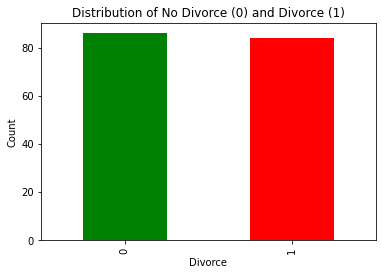

In [12]:
count.plot(kind='bar', color=['green', 'red'])
plt.title("Distribution of No Divorce (0) and Divorce (1)")
plt.xlabel("Divorce")
plt.ylabel("Count")
plt.savefig('DivorceDistribution.png')
plt.show()

## Pie Plot

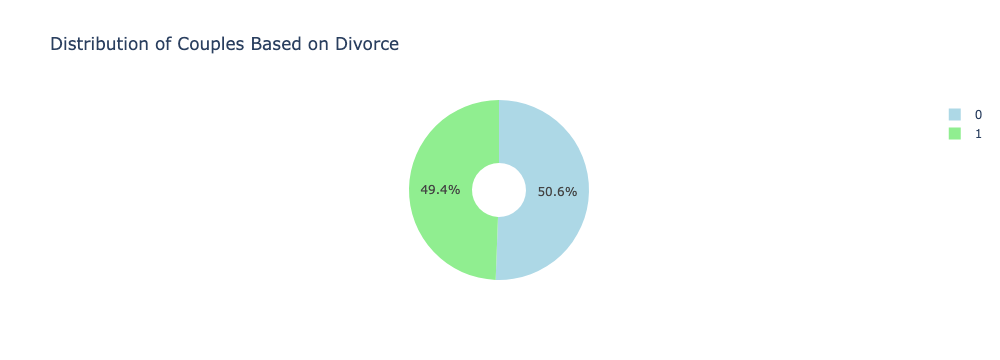

In [13]:
divorce_label = count.index
divorce_size = count.values

colors = ['lightblue', 'lightgreen']

trace = go.Pie(labels = divorce_label,
              values = divorce_size,
               marker = dict(colors = colors),
               hole = 0.3
              )
dataset = [trace]
layout = go.Layout(title = 'Distribution of Couples Based on Divorce')

fig = go.Figure(data = dataset, layout = layout)
py.iplot(fig)

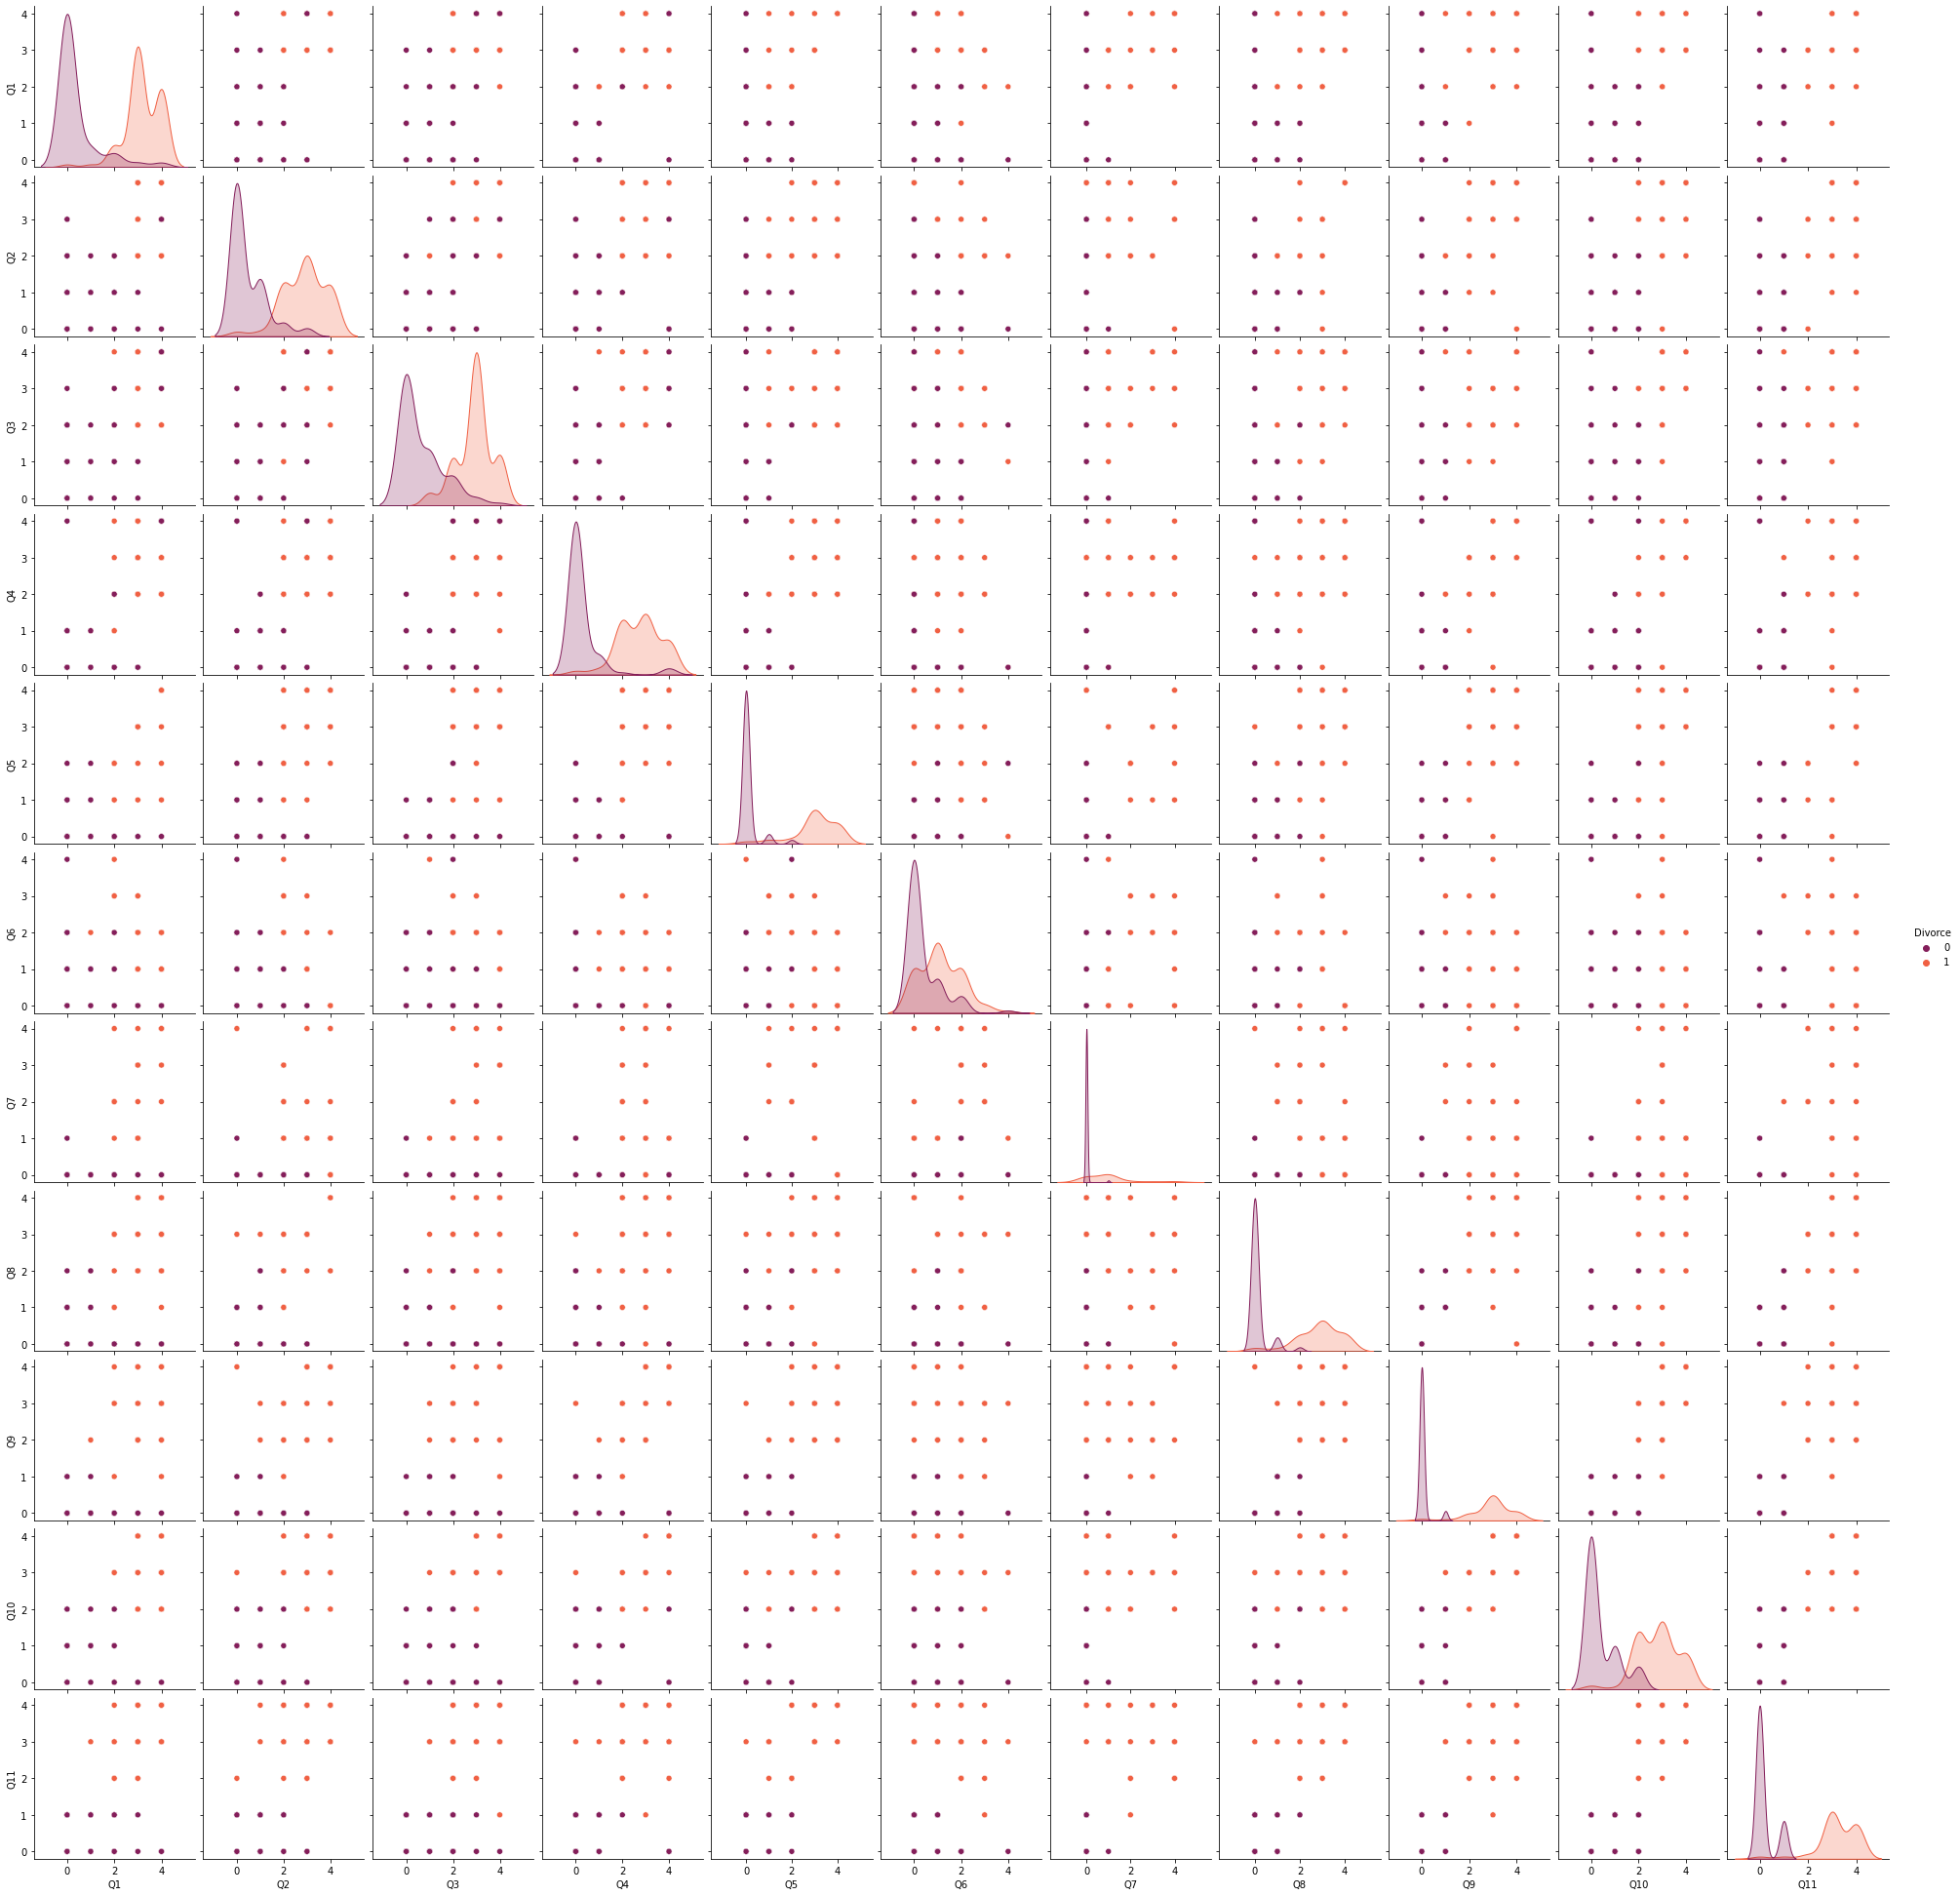

In [14]:
#data visulaization using scatter plot, for the columns, will create a pair plot

cols = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Divorce']
sns.pairplot(data = data[cols], hue = 'Divorce', palette ='rocket')
plt.savefig('pairplot_Q1-Q11.png')

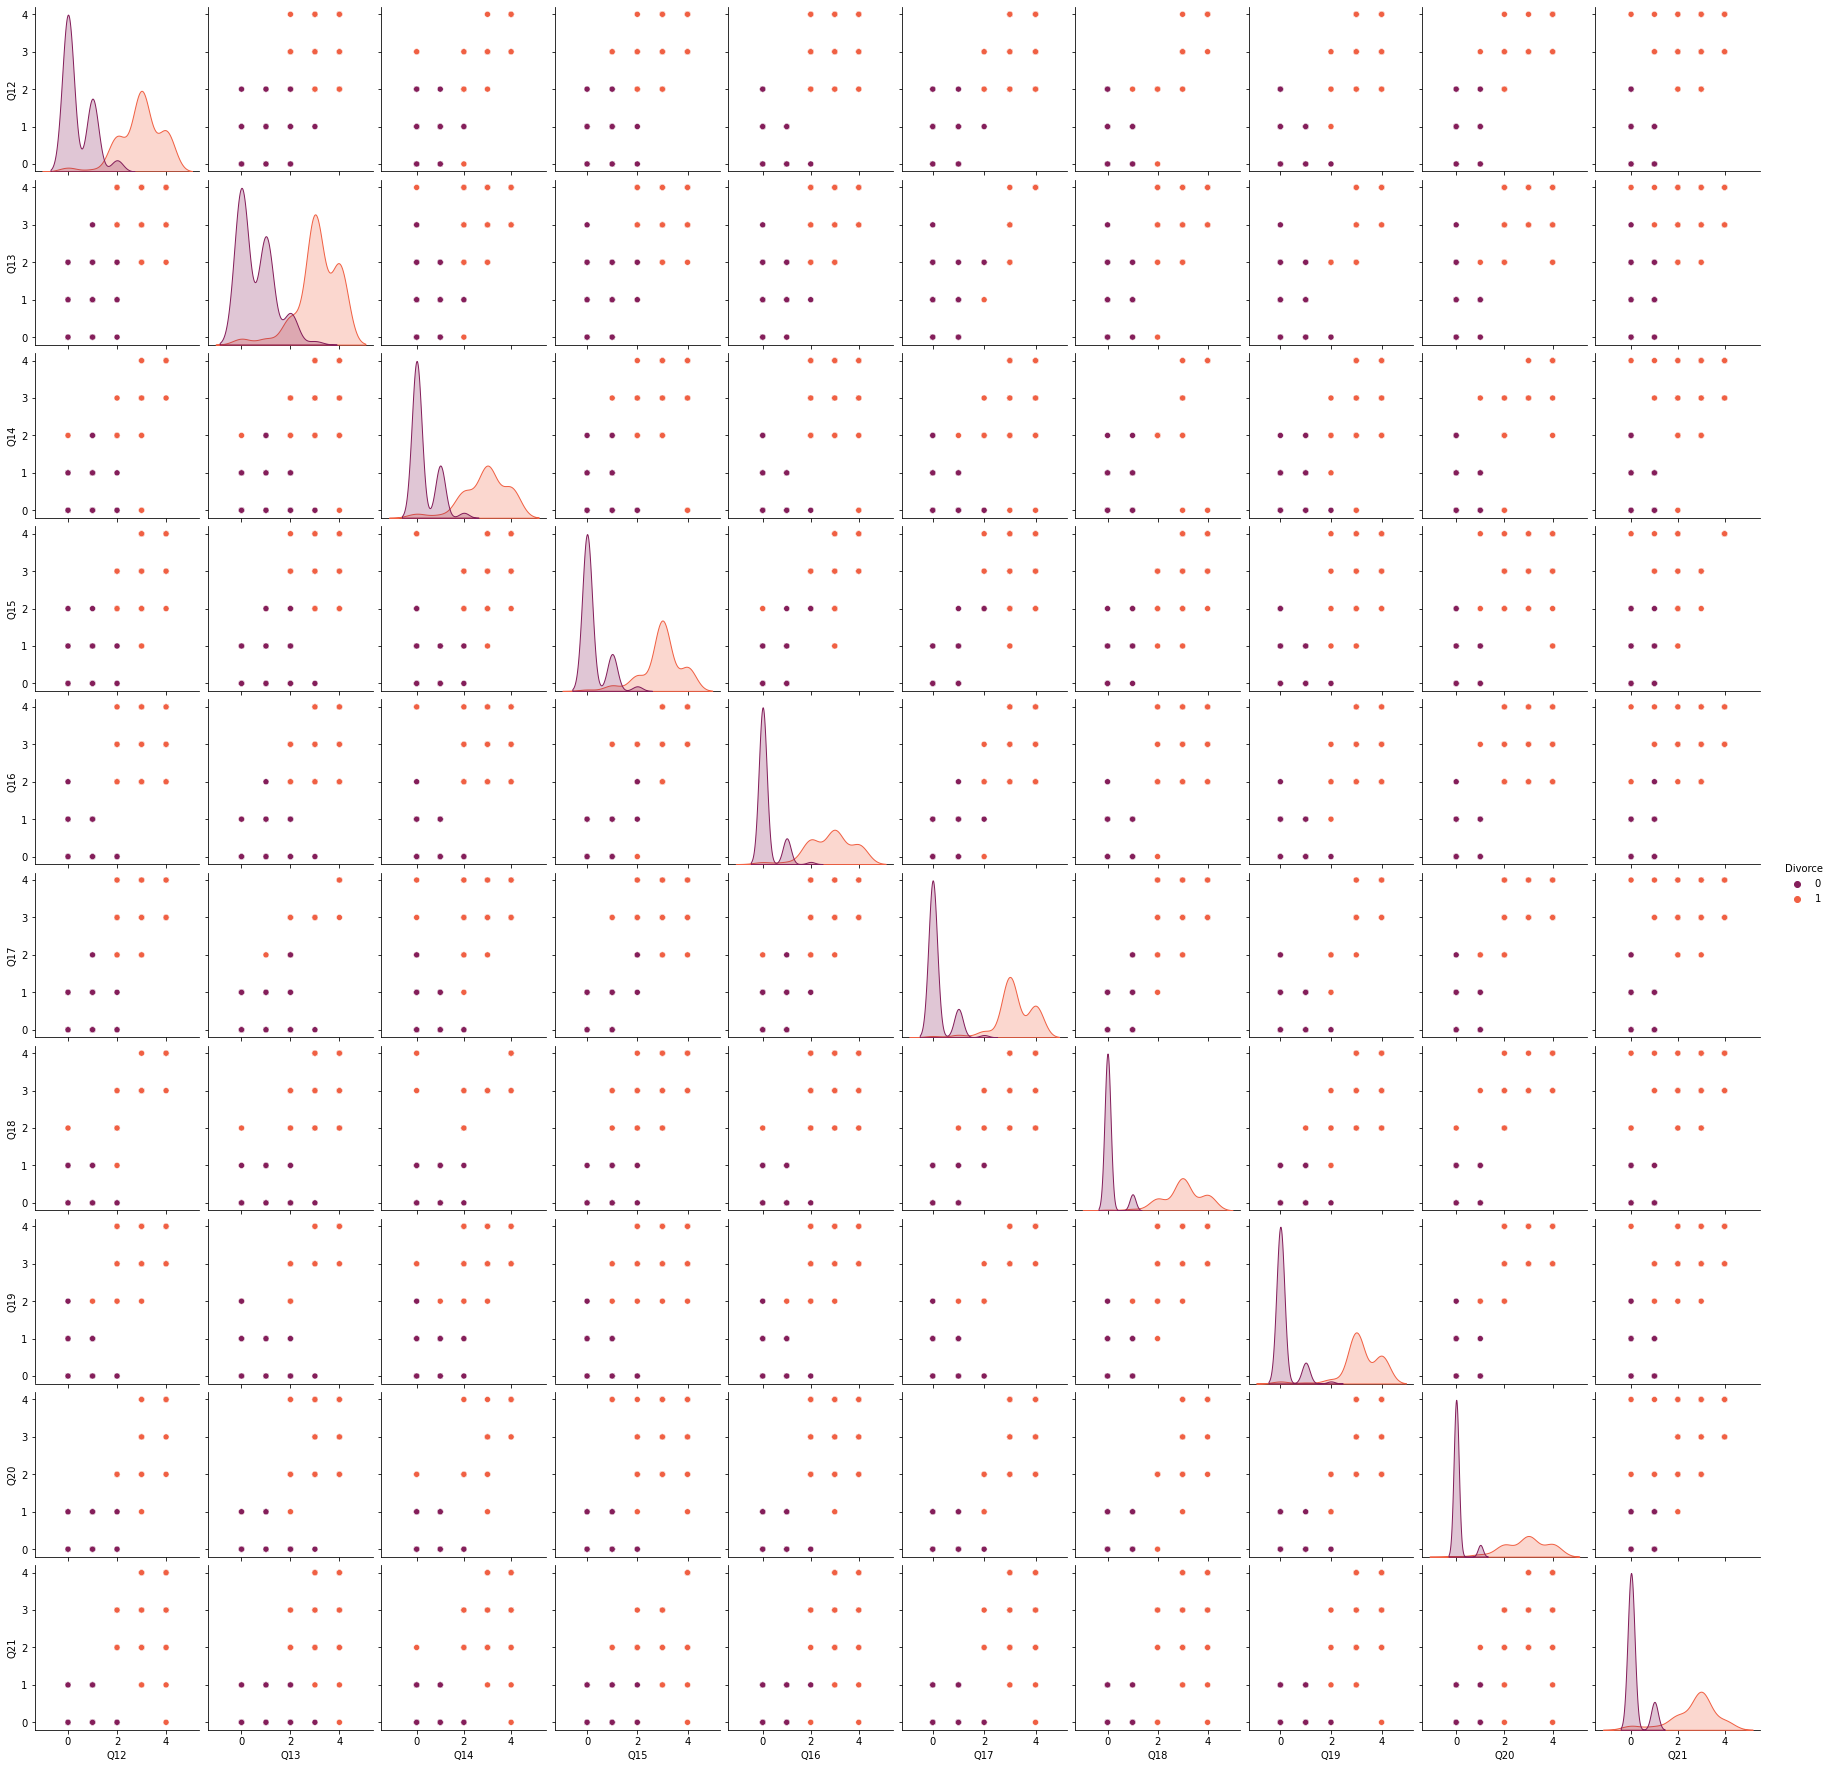

In [15]:
cols = ['Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Divorce']
sns.pairplot(data = data[cols], hue = 'Divorce', palette ='rocket')
plt.savefig('pairplot_Q12-Q21.png')

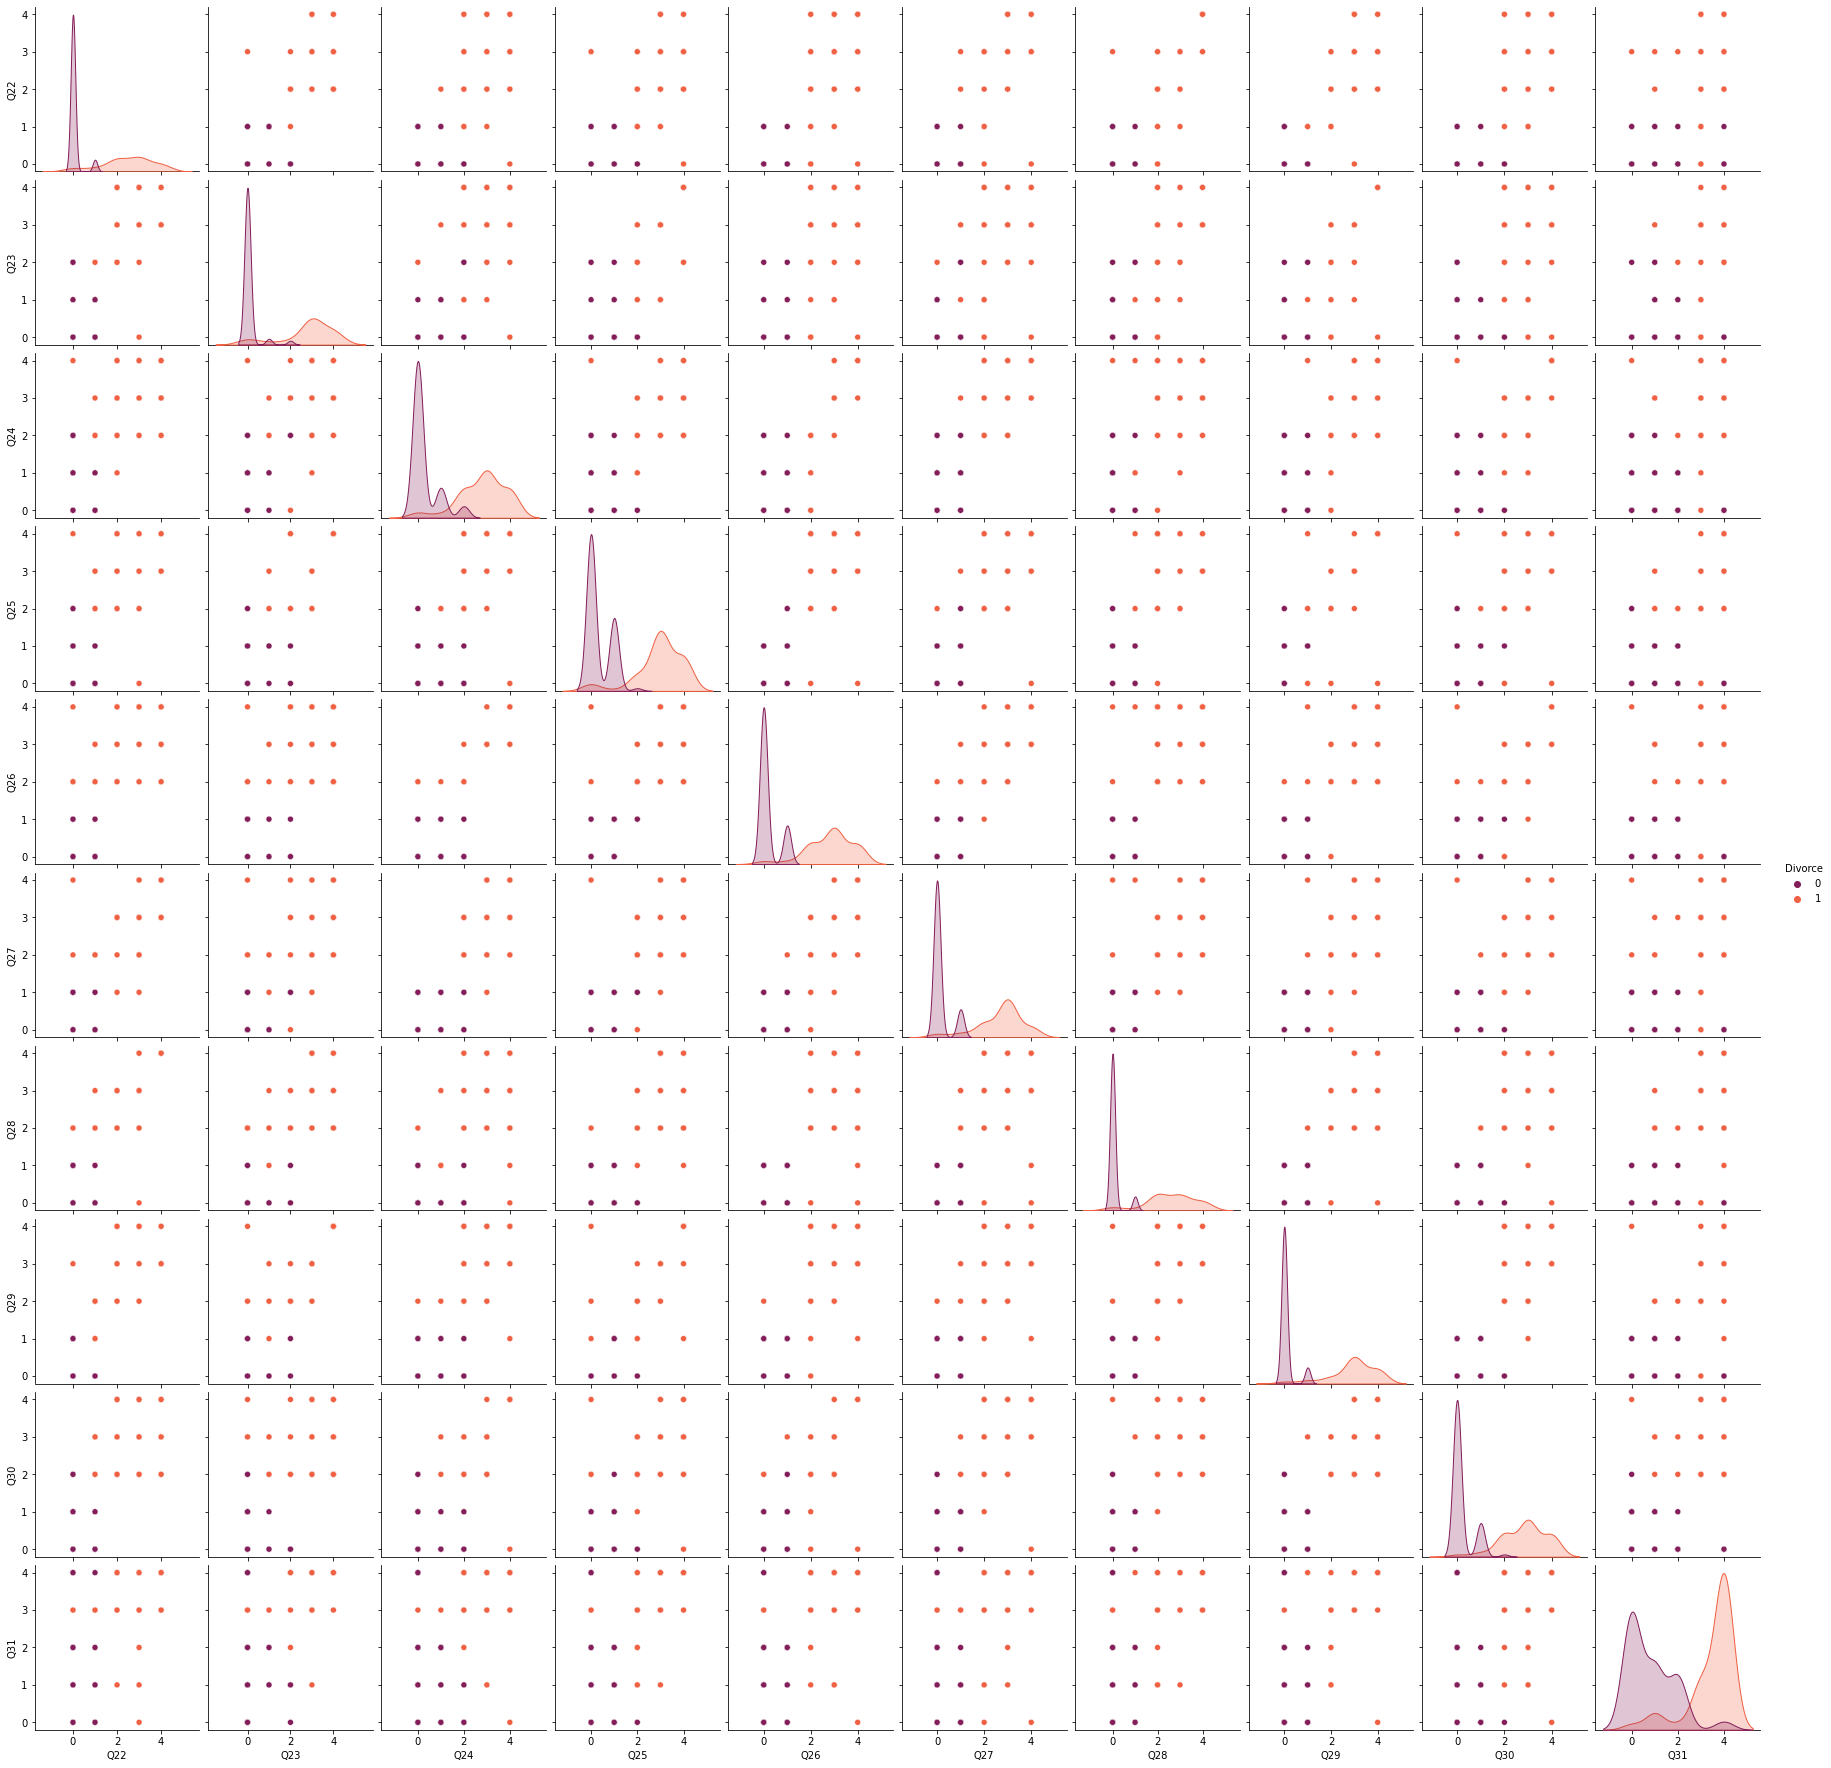

In [16]:
cols = ['Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31','Divorce']
sns.pairplot(data = data[cols], hue = 'Divorce', palette ='rocket')
plt.savefig('pairplot_Q22-Q30.png')

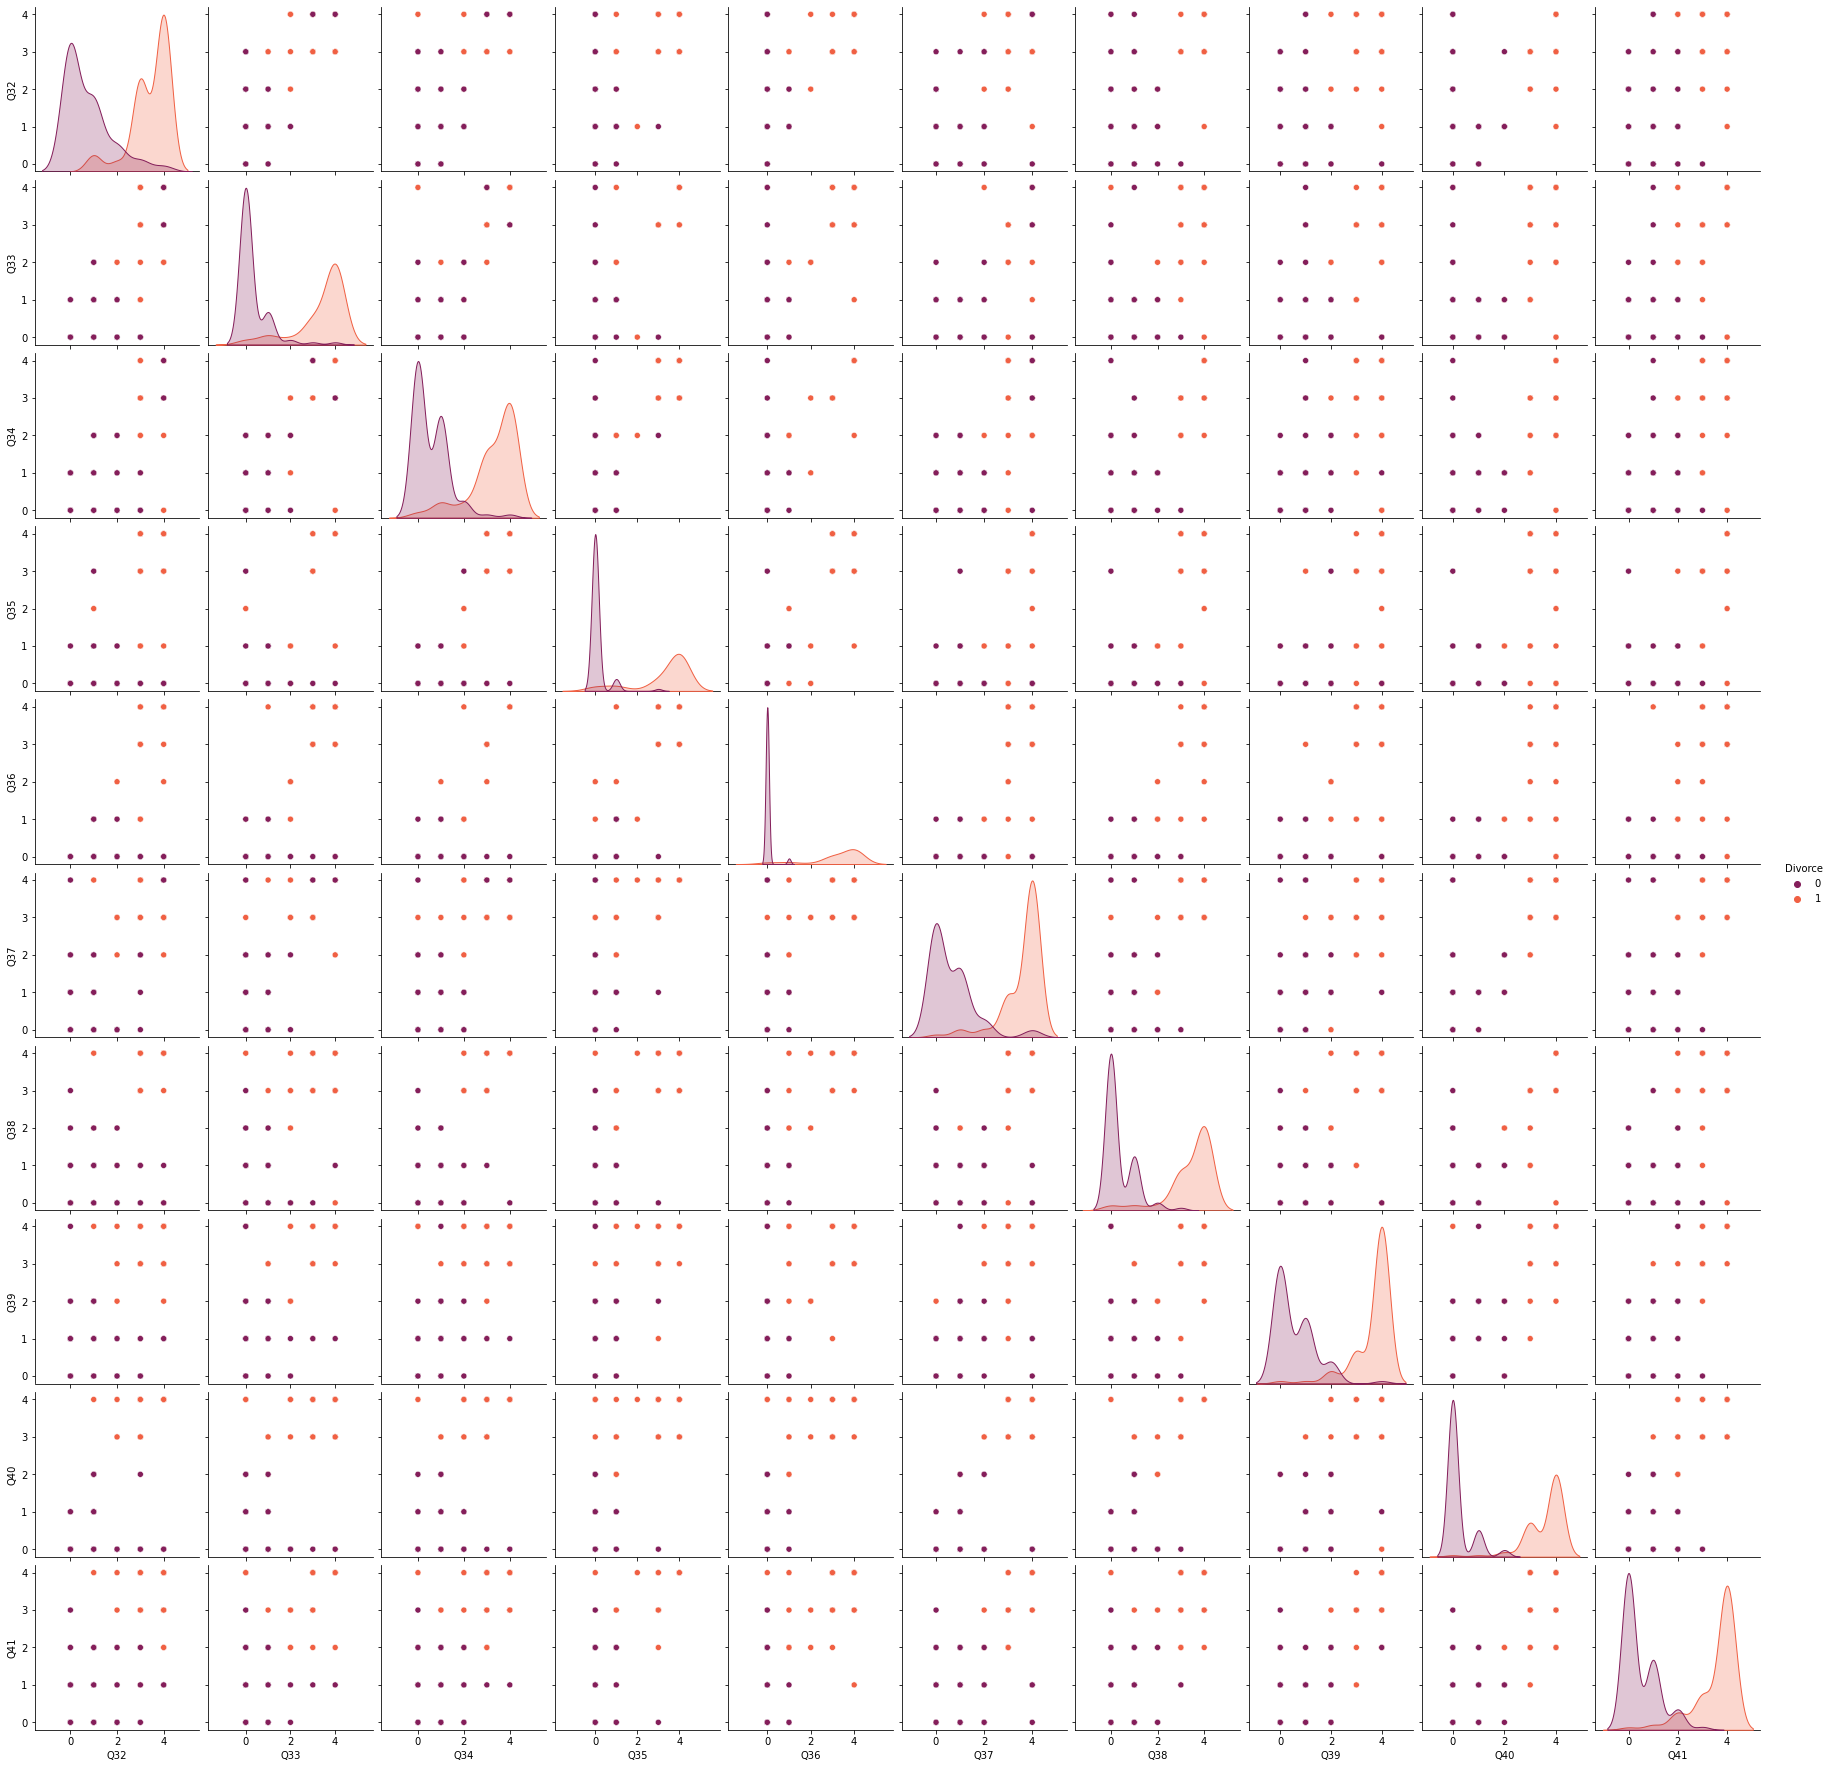

In [17]:
cols = ['Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41','Divorce']
sns.pairplot(data = data[cols], hue = 'Divorce', palette ='rocket')
plt.savefig('pairplot_Q32-Q41.png')

In [18]:
cols = [   'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Divorce']
sns.pairplot(data = data[cols], hue = 'Divorce', palette ='rocket')
plt.savefig('pairplot_Q42-Q51.png')

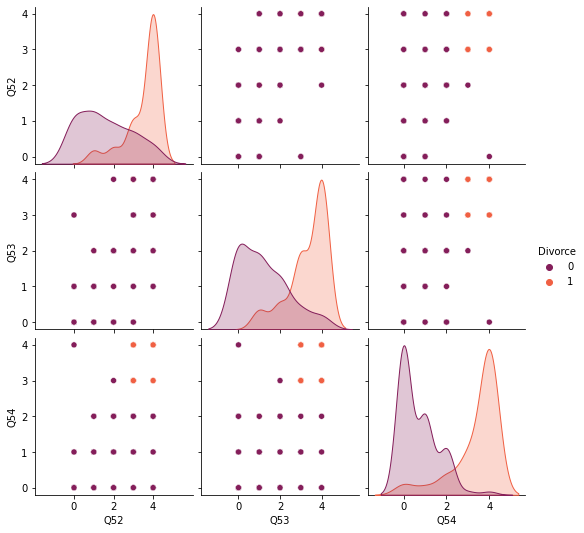

In [19]:
cols = ['Q52', 'Q53', 'Q54', 'Divorce']
sns.pairplot(data = data[cols], hue = 'Divorce', palette ='rocket')
plt.savefig('pairplot_Q52-Q54.png')

## Correlation Matrix

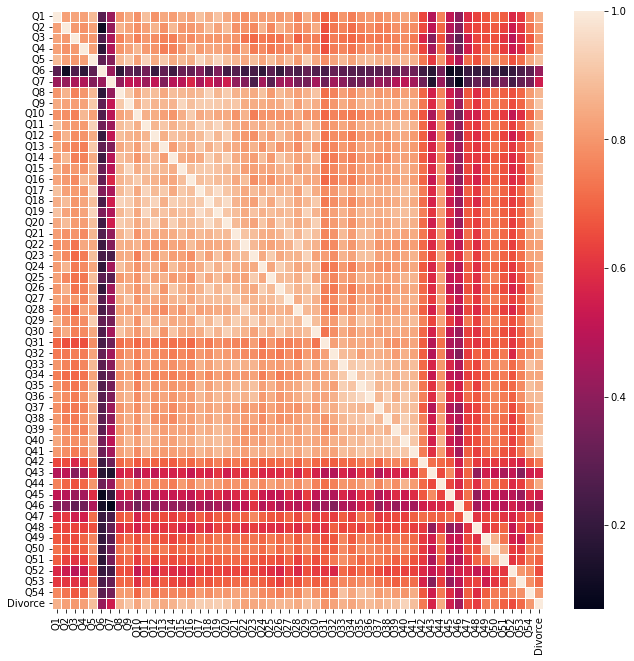

In [20]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(11,11)) 
sns.heatmap(
    corr, linewidths=1,
    xticklabels = corr.columns, yticklabels = corr.columns )
plt.savefig('correlationmap.png')

## Violin Plot to compare all the factors on which are predicted to get a Divorce or Not

<AxesSubplot:xlabel='Divorce', ylabel='Q1'>

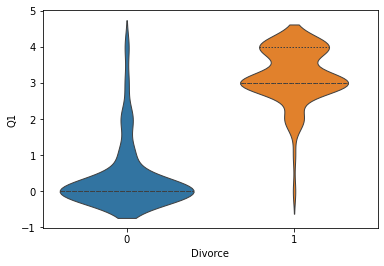

In [21]:
sns.violinplot(x='Divorce', y='Q1', data=data,
               inner="quart", linewidth=1)

[[<AxesSubplot:title={'center':'Q1'}> <AxesSubplot:title={'center':'Q2'}>
  <AxesSubplot:title={'center':'Q3'}> <AxesSubplot:title={'center':'Q4'}>
  <AxesSubplot:title={'center':'Q5'}> <AxesSubplot:title={'center':'Q6'}>
  <AxesSubplot:title={'center':'Q7'}>]
 [<AxesSubplot:title={'center':'Q8'}> <AxesSubplot:title={'center':'Q9'}>
  <AxesSubplot:title={'center':'Q10'}>
  <AxesSubplot:title={'center':'Q11'}>
  <AxesSubplot:title={'center':'Q12'}>
  <AxesSubplot:title={'center':'Q13'}>
  <AxesSubplot:title={'center':'Q14'}>]
 [<AxesSubplot:title={'center':'Q15'}>
  <AxesSubplot:title={'center':'Q16'}>
  <AxesSubplot:title={'center':'Q17'}>
  <AxesSubplot:title={'center':'Q18'}>
  <AxesSubplot:title={'center':'Q19'}>
  <AxesSubplot:title={'center':'Q20'}>
  <AxesSubplot:title={'center':'Q21'}>]
 [<AxesSubplot:title={'center':'Q22'}>
  <AxesSubplot:title={'center':'Q23'}>
  <AxesSubplot:title={'center':'Q24'}>
  <AxesSubplot:title={'center':'Q25'}>
  <AxesSubplot:title={'center':'Q26'}>


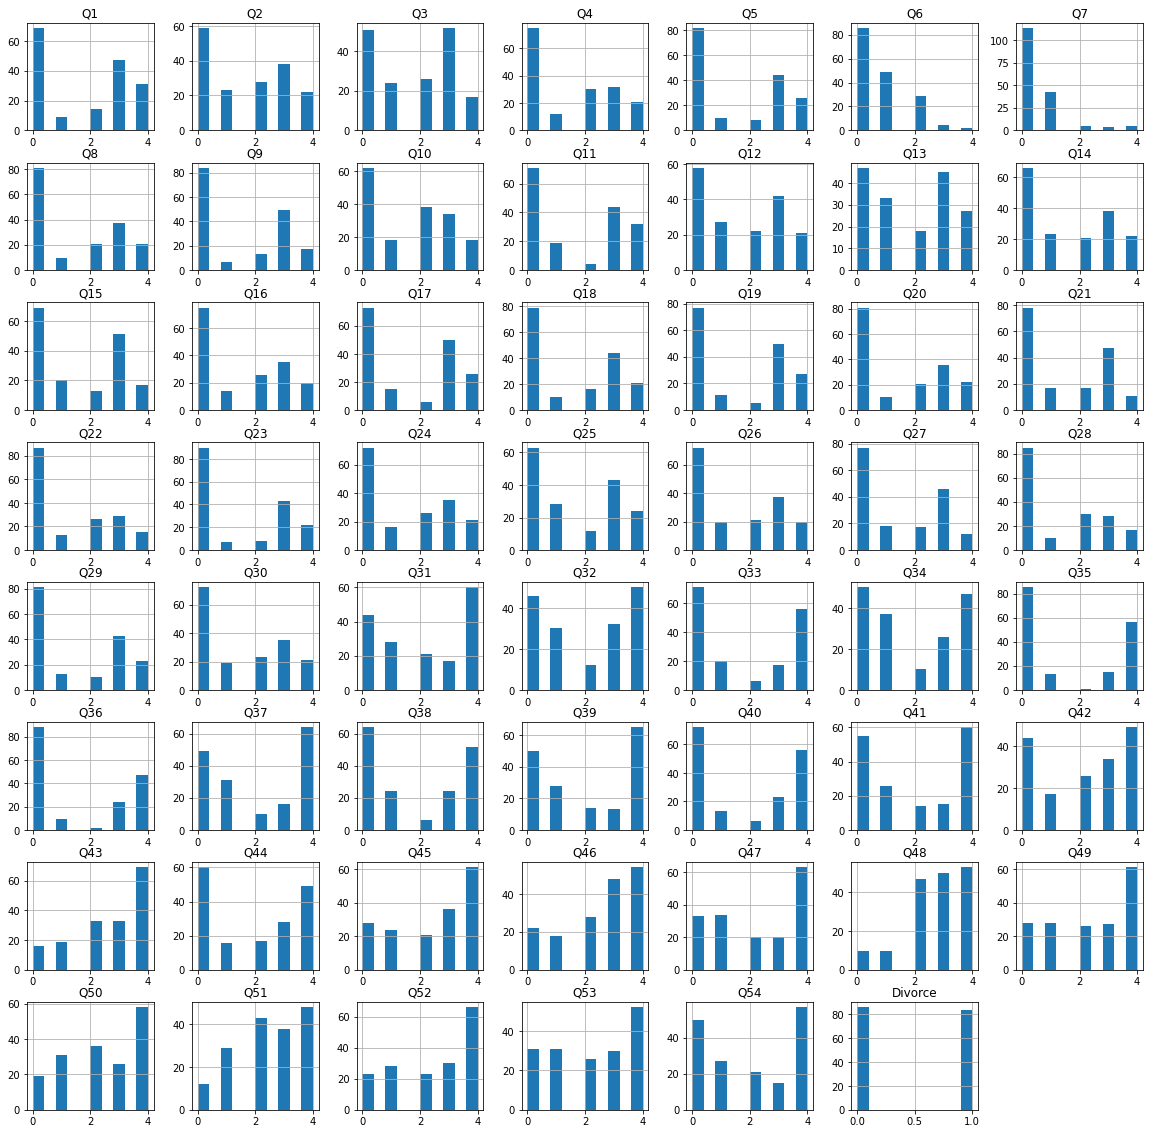

In [22]:
print(data.hist(figsize=(20,20)))
plt.savefig('histplot.png')

## MACHINE LEARNING ALGORITHM - LOGISTIC REGRESSION/RANDOM FOREST
## PREDICITING HOW MANY COUPLES ARE LIKELY TO GET A DIVORCE BASED ON FACTORS

## Splitting the dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [24]:
print(X_train)

[[1 0 1 ... 2 2 3]
 [3 4 3 ... 4 4 4]
 [0 3 2 ... 2 0 1]
 ...
 [3 3 3 ... 3 3 3]
 [0 2 0 ... 3 2 2]
 [3 3 2 ... 3 4 4]]


In [25]:
print(X_test)

[[4 2 3 ... 4 4 4]
 [0 0 0 ... 1 1 0]
 [4 4 4 ... 4 3 4]
 ...
 [3 3 3 ... 4 3 4]
 [0 0 1 ... 2 2 0]
 [4 4 4 ... 4 4 4]]


In [26]:
print(y_train)

[0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 1 0 0 1 0 1]


In [27]:
print(y_test)

[1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 0 1]


### Feature Scalling using Standardization Method

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
print(X_train)

[[-0.43581277 -1.0931724  -0.49619571 ... -0.33558498 -0.15637822
   0.65560902]
 [ 0.82910722  1.70440859  0.94398208 ...  1.01813069  1.17283667
   1.26512052]
 [-1.06827277  1.00501334  0.22389318 ... -0.33558498 -1.48559311
  -0.563414  ]
 ...
 [ 0.82910722  1.00501334  0.94398208 ...  0.34127286  0.50822922
   0.65560902]
 [-1.06827277  0.30561809 -1.2162846  ...  0.34127286 -0.15637822
   0.04609751]
 [ 0.82910722  1.00501334  0.22389318 ...  0.34127286  1.17283667
   1.26512052]]


In [30]:
print(X_test)

[[ 1.46156722  0.30561809  0.94398208 ...  1.01813069  1.17283667
   1.26512052]
 [-1.06827277 -1.0931724  -1.2162846  ... -1.01244281 -0.82098567
  -1.1729255 ]
 [ 1.46156722  1.70440859  1.66407097 ...  1.01813069  0.50822922
   1.26512052]
 ...
 [ 0.82910722  1.00501334  0.94398208 ...  1.01813069  0.50822922
   1.26512052]
 [-1.06827277 -1.0931724  -0.49619571 ... -0.33558498 -0.15637822
  -1.1729255 ]
 [ 1.46156722  1.70440859  1.66407097 ...  1.01813069  1.17283667
   1.26512052]]


### Training the Logistic Regression model on the Training set

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 100)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=100)

### Predicting the Test set results

In [32]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


### Getting the Confusion Matrix and Accuracy Score

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
ac=accuracy_score(y_test, y_pred)
print("Accuracy Score for Logistic Regression is: " + str(ac *100))

[[23  0]
 [ 2 26]]
Accuracy Score for Logistic Regression is: 96.07843137254902


Accuracy Score for Logistic Regression is: 96.07843137254902 %## Random Forest